In [1]:
import matplotlib.pyplot as plt
import mysql.connector as connector
import pandas as pd
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
conn = connector.connect(user='root', password='123456', host='localhost', port='3306', database='my_db')

mycursor = conn.cursor()

mycursor.execute('SELECT * FROM price_sentiment')
result = mycursor.fetchall()
df = pd.DataFrame(result, columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock_Splits', 'Score', 'Positive' , 'Negative', 'Neutral', 'Total_Sentiment'])

df.set_index('Date', drop = True, inplace=True)
date = df.index
df.drop(['Open', 'High', 'Low', 'Dividends', 'Stock_Splits', 'Score'], inplace=True, axis=1)

In [3]:
filename = "finalized_model.sav"

with open(filename, 'rb') as file:
    model = pickle.load(file)

In [4]:
df.shape

(1791, 6)

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [6]:

data= []

n_future=1
n_past = 14

for i in range(n_past, len(df_scaled)-n_future+1):
    data.append(df_scaled[i-n_past: i , 0: df_scaled.shape[1]])

In [7]:
data = np.array(data)

In [8]:
data.shape

(1777, 14, 6)

In [9]:
predictions = model.predict(data)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [10]:
predictions.shape

(1777, 1)

In [11]:
print(predictions)

[[-0.741823 ]
 [-0.7357215]
 [-0.7398635]
 ...
 [ 2.708617 ]
 [ 2.4457889]
 [ 2.535091 ]]


In [12]:
print(predictions.flatten())

[-0.741823  -0.7357215 -0.7398635 ...  2.708617   2.4457889  2.535091 ]


In [13]:
original_rows = data[:, -1, :]  
original_rows[:, 0] = predictions.flatten()
inverse_rows = scaler.inverse_transform(original_rows)
y_pred_inverse = inverse_rows[:, 0]

In [14]:
y_pred_inverse

array([  6.41218995,   6.74073196,   6.51770173, ..., 192.20527283,
       178.05297768, 182.86155445], shape=(1777,))

In [15]:
df.index[14]

datetime.date(2016, 12, 2)

In [16]:
date = df.index[14:]

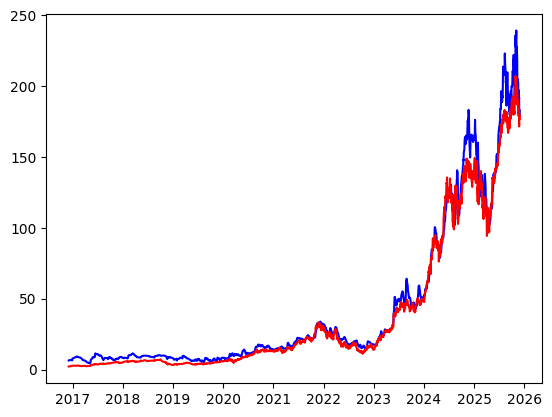

In [17]:
plt.plot(date, y_pred_inverse, label='Predicted Close Price', color='blue')
plt.plot(date, df['Close'].iloc[14:len(df)], label='Real Close Price', color='red')
plt.show()

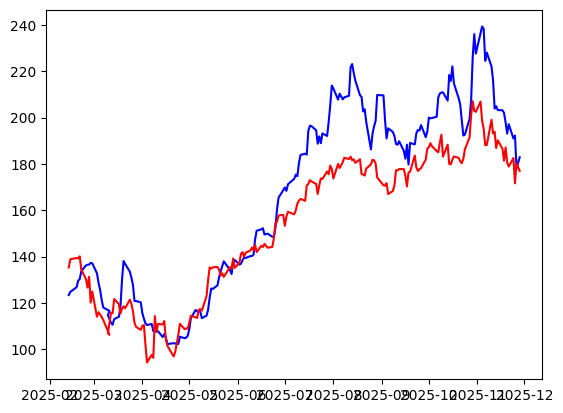

In [ ]:
plt.plot(date[-200:], y_pred_inverse[-30:], label='Predicted Close Price', color='blue')
plt.plot(date[-200:], df['Close'].iloc[-30:], label='Real Close Price', color='red')
plt.show()

In [21]:
y_pred_inverse[-1]

np.float64(182.8615544541903)